In [2]:
import DiadFit as pf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
a, b, c, d, e=pf.mix_fugacity_ind(P_kbar=3, T_K=1200, XH2O=0.5, Vmix=53.975)

phi0_pure
0.9172418672277634
phi1_pure
2.3643474053245277
lnphi_mix
[0.40324910391066937, 0.6240261325021761]
Phi mixed
1.4966796739906976
1.8664274190677694
phi_mix
[1.4966796739906976, 1.8664274190677694]


In [4]:
P_kbar=3
T_K=1200
XH2O=0.5
P=P_kbar*1000
TK=T_K
XCO2=1-XH2O
Y = [0] * 2
Y[0]=XH2O
Y[1]=XCO2
Vmix=53.975

## Mixed parameters


# Now we need to do the mixed fugacity part of this
#--------------------------------------------------------------------------
k1_temperature, k2_temperature, k3_temperature, a1, a2, g, b, Vc, B, C, D, E, F, Vguess=pf.get_EOS_params(P, TK)
Bij, Vcij, BVc_prm, BVc, Cijk, Vcijk, CVc2_prm, CVc2, Dijklm, Vcijklm, DVc4_prm, DVc4, Eijklmn, Vcijklmn, EVc5_prm,  EVc5, Fij, FVc2_prm, FVc2, bmix, b_prm, gijk, gVc2_prm, gVc2=pf.mixing_rules(B, Vc, Y, b, g, k1_temperature, k2_temperature, k3_temperature)
Zmix=(P*Vmix)/(83.14467*TK)
lnphi_mix = [0.0, 0.0]
phi_mix = [0.0, 0.0]
lnphi_mix[0]=pf.mix_lnphi(0,  Zmix, BVc_prm, CVc2_prm, DVc4_prm, EVc5_prm, FVc2_prm, bmix, b_prm, gVc2, gVc2_prm, Vmix)
lnphi_mix[1]=pf.mix_lnphi(1,  Zmix, BVc_prm, CVc2_prm, DVc4_prm, EVc5_prm, FVc2_prm, bmix, b_prm, gVc2, gVc2_prm, Vmix)


## Okay and now lets do high presure
Bij_HP, Vcij_HP, BVc_prm_HP, BVc_HP, Cijk_HP, Vcijk_HP, CVc2_prm_HP, CVc2_HP, Dijklm_HP, Vcijklm_HP, DVc4_prm_HP, DVc4_HP, Eijklmn_HP, Vcijklmn_HP, EVc5_prm_HP,  EVc5_HP, Fij_HP, FVc2_prm_HP, FVc2_HP, bmix_HP, b_prm_HP, gijk_HP, gVc2_prm_HP, gVc2_HP=pf.mixing_rules(B_HP, Vc_HP, Y, b_HP, g_HP, k1_temperature_HP, k2_temperature_HP, k3_temperature_HP)
Vmix_HP=pf.mixvolume(100, 2000, BVc_HP, CVc2_HP, DVc4_HP, EVc5_HP, FVc2_HP, bmix_HP, gVc2_HP, TK)
Zmix_HP=(2000*Vmix_HP)/(83.14467*TK)
lnphi_mix_HP = [0.0, 0.0]
lnphi_mix_HP[0]=pf.mix_lnphi(0,  Zmix_HP, BVc_prm_HP, CVc2_prm_HP, DVc4_prm_HP, EVc5_prm_HP, FVc2_prm_HP, bmix_HP, b_prm_HP, gVc2_HP, gVc2_prm_HP, Vmix_HP)
lnphi_mix_HP[1]=pf.mix_lnphi(1,  Zmix_HP, BVc_prm_HP, CVc2_prm_HP, DVc4_prm_HP, EVc5_prm_HP, FVc2_prm_HP, bmix_HP, b_prm_HP, gVc2_HP, gVc2_prm_HP, Vmix_HP)




NameError: name 'B_HP' is not defined

In [9]:
lnphi_mix

[-0.05773753754738608, 0.6551266847421117]

In [4]:
def mix_lnphi2(i, Zmix, BVc_prm, CVc2_prm, DVc4_prm, EVc5_prm, FVc2_prm, bmix, b_prm, gVc2, gVc2_prm, Vmix):
    lnph = -math.log(Zmix)
    lnph += (BVc_prm[i] / Vmix)
    lnph += (CVc2_prm[i] / (2.0 * Vmix ** 2))
    lnph += (DVc4_prm[i] / (4.0 * Vmix ** 4))
    lnph += (EVc5_prm[i] / (5.0 * Vmix ** 5))
    lnph += ((FVc2_prm[i] * bmix + b_prm[i] * FVc2) / (2 * gVc2)) * (1.0 - math.exp(-gVc2 / (Vmix ** 2)))
    lnph += ((FVc2_prm[i] * gVc2 + gVc2_prm[i] * FVc2 - FVc2 * bmix * (gVc2_prm[i] - gVc2)) / (2.0 * gVc2 ** 2)) * (1.0 - (gVc2 / (Vmix ** 2) + 1.0) * math.exp(-gVc2 / (Vmix ** 2)))
    lnph += -(((gVc2_prm[i] - gVc2) * FVc2) / (2 * gVc2 ** 2)) * (2.0 - (((gVc2 ** 2) / (Vmix ** 4)) + (2.0 * gVc2 / (Vmix ** 2)) + 2.0) * math.exp(-gVc2 / (Vmix ** 2)))


    return lnph


In [5]:
lnphi_mix[0]=mix_lnphi2(0,  Zmix, BVc_prm, CVc2_prm, DVc4_prm, EVc5_prm, FVc2_prm, bmix, b_prm, gVc2, gVc2_prm, Vmix)
lnphi_mix[1]=mix_lnphi2(1,  Zmix, BVc_prm, CVc2_prm, DVc4_prm, EVc5_prm, FVc2_prm, bmix, b_prm, gVc2, gVc2_prm, Vmix)
lnphi_mix


[-0.05773753754738608, 0.6551266847421117]

In [6]:
pf.mix_lnphi(0,  Zmix, BVc_prm, CVc2_prm, DVc4_prm, EVc5_prm, FVc2_prm, bmix, b_prm, gVc2, gVc2_prm, Vmix)



0.06769408652809983

In [7]:
pf.mix_lnphi2(0,  Zmix, BVc_prm, CVc2_prm, DVc4_prm, EVc5_prm, FVc2_prm, bmix, b_prm, gVc2, gVc2_prm, Vmix)
mix_lnphi2(i, Zmix, BVc_prm, CVc2_prm, DVc4_prm, EVc5_prm, FVc2_prm, bmix, b_prm, gVc2, gVc2_prm, Vmix):


SyntaxError: invalid syntax (2330146167.py, line 2)

In [ ]:
Zmix

1.622924235552321

In [ ]:
BVc_prm

array([-39.35776613, -55.77643689])

In [ ]:
CVc2_prm

array([3812.02203588, 5340.92790465])

In [ ]:
b_prm

array([-0.31502817, -8.47988634])

In [ ]:
gVc2

1728.1185295899318

In [ ]:
gVc2_prm

array([3956.91285715, 6411.79832039])

In [ ]:
lnphi_mix[0]=pf.mix_lnphi2(0,  Zmix, BVc_prm, CVc2_prm, DVc4_prm, EVc5_prm, FVc2_prm, bmix, b_prm, gVc2, gVc2_prm, Vmix)
lnphi_mix[1]=pf.mix_lnphi2(1,  Zmix, BVc_prm, CVc2_prm, DVc4_prm, EVc5_prm, FVc2_prm, bmix, b_prm, gVc2, gVc2_prm, Vmix)


In [ ]:
lnphi_mix

[0.06769408652809983, 0.31471910401816533]

In [ ]:
lnphi_mix

[-0.130168157676548, -0.061840773474427735]

In [ ]:
gVc2

1728.1185295899318

In [ ]:
lnphi_mix

[0.06769408652809983, 0.31471910401816533]

In [ ]:
CVc2_prm

array([3812.02203588, 5340.92790465])

In [ ]:
BVc_prm

array([-39.35776613, -55.77643689])

In [ ]:
lnphi_mix

[0.06769408652809983, 0.31471910401816533]

In [ ]:
VMix

[0.06769408652809983, 0.31471910401816533]

In [ ]:
[phi0_pure, phi1_pure]

[0.9172418672277634, 2.3643474053245277]

In [ ]:
a, b, c, d, e=pf.mix_fugacity_ind(P_kbar=3, T_K=1200, XH2O=0.5, Vmix=53.975)

phi0_pure
0.9172418672277634
phi1_pure
2.3643474053245277
Phi mixed
1.4966796739906976
1.8664274190677694
phi_mix
[1.4966796739906976, 1.8664274190677694]


In [ ]:
stop

NameError: name 'stop' is not defined

In [ ]:
phi_mix

[0.913619571588939, 1.2980439443343712]

In [ ]:
a, b, c, d, e=pf.mix_fugacity_ind(P_kbar=1, T_K=1200, XH2O=0.5, Vmix=113.5643)

phi_mix
[0.9150684235337881, 1.3022049919810221]


In [ ]:
df_C=pd.read_excel('Duan_Zhang_2006_C_Code.xlsx', sheet_name='Sheet1')

In [ ]:
df=pf.H2O_CO2_EOS_DZ2006_knownP(P_kbar=df_C['P (bar)']/1000, T_K=df_C['T (K)'], XH2O=1-df_C['yCO2'])
df.head()


phi_mix
[0.9344281964497142, 1.2919706609951094]
phi_mix
[0.9280670518989675, 1.2926602464757486]
phi_mix
[0.9230949759387839, 1.2942663745723368]
phi_mix
[0.9193652819748636, 1.2965722851564283]
phi_mix
[0.9167378215342085, 1.2993234106009621]
phi_mix
[0.9150681173413941, 1.3022044004874214]
phi_mix
[0.914194402433837, 1.3048082769152152]
phi_mix
[0.9139205586325142, 1.3065932169929033]
phi_mix
[0.9139918985521293, 1.306819931103272]
phi_mix
[0.9140587936119012, 1.304458251832093]
phi_mix
[0.9136194844785533, 1.2980437547579862]
phi_mix
[3.1553148052379676, 4.2541709358427555]
phi_mix
[2.739800582336002, 4.178100002696014]
phi_mix
[2.43717083943468, 4.147383675527983]
phi_mix
[2.2031041406610647, 4.154289200642389]
phi_mix
[2.0140963526415154, 4.198936572518836]
phi_mix
[1.8565216358547247, 4.288328220571881]
phi_mix
[1.7220326993949358, 4.438823865111753]
phi_mix
[1.6054749166658253, 4.684164642001788]
phi_mix
[1.5040778275436264, 5.098839236309897]
phi_mix
[1.4179203554127053, 5.882

,P_kbar,T_K,XH2O,XCO2,Molar Volume (cm3/mol),Density (g/cm3),Compressability_factor,fugacity_H2O,fugacity_CO2,activity_H2O,activity_CO2
0,1.0,1200,0.0,1.0,127.742642,0.344443,1.280325,0.000000,1.291971,0.000000,0.999896
1,1.0,1200,0.1,0.9,125.333500,0.330319,1.256179,0.092807,1.163394,0.100803,0.900387
2,1.0,1200,0.2,0.8,122.709086,0.316195,1.229875,0.184619,1.035413,0.200527,0.801338
3,1.0,1200,0.3,0.7,119.872066,0.301989,1.201441,0.275810,0.907601,0.299575,0.702420
4,1.0,1200,0.4,0.6,116.823775,0.287613,1.170889,0.366695,0.779594,0.398292,0.603352


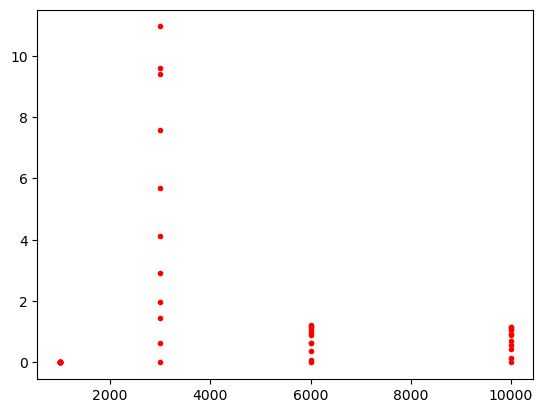

In [ ]:
big_diff=abs(df_C['fH2O (kbar)']-df['fugacity_H2O'])
plt.plot(df_C['P (bar)'], big_diff, '.r')

Text(0, 0.5, 'aCO2')

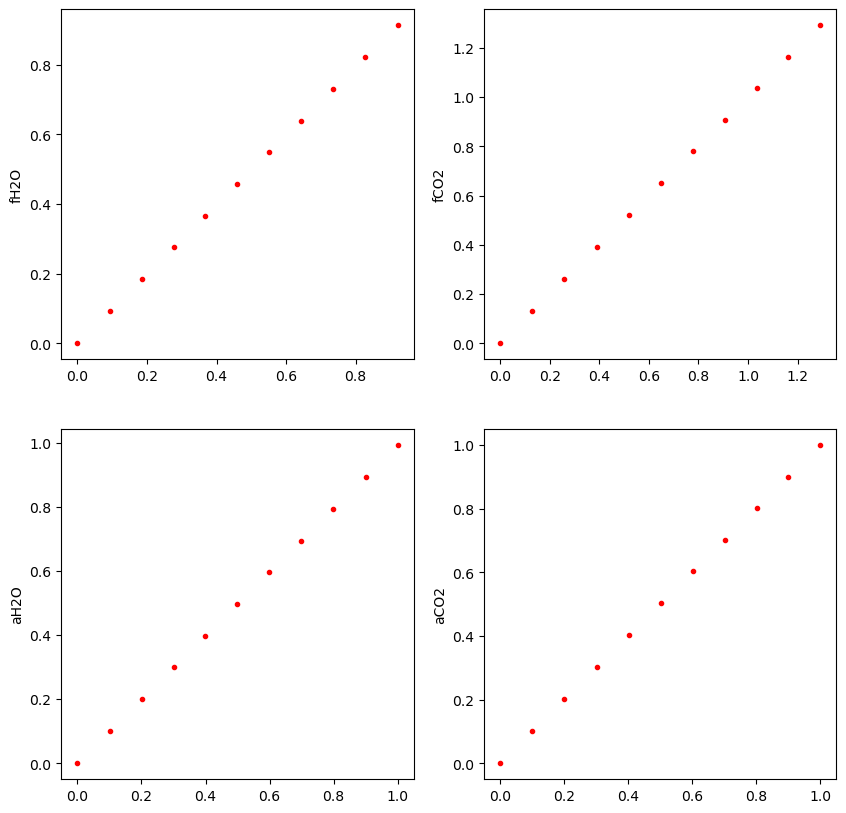

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
P1000=df_C['P (bar)']==1000
ax1.plot(df_C['fH2O (kbar)'].loc[P1000], df['fugacity_H2O'].loc[P1000], '.r')
ax1.set_ylabel('fH2O')

ax2.plot(df_C['fCO2 (kbar)'].loc[P1000], df['fugacity_CO2'].loc[P1000], '.r')
ax2.set_ylabel('fCO2')

ax3.plot(df_C['aH2O'].loc[P1000], df['activity_H2O'].loc[P1000], '.r')
ax3.set_ylabel('aH2O')

ax4.plot(df_C['aCO2'].loc[P1000], df['activity_CO2'].loc[P1000], '.r')
ax4.set_ylabel('aCO2')


Text(0, 0.5, 'Z (python)')

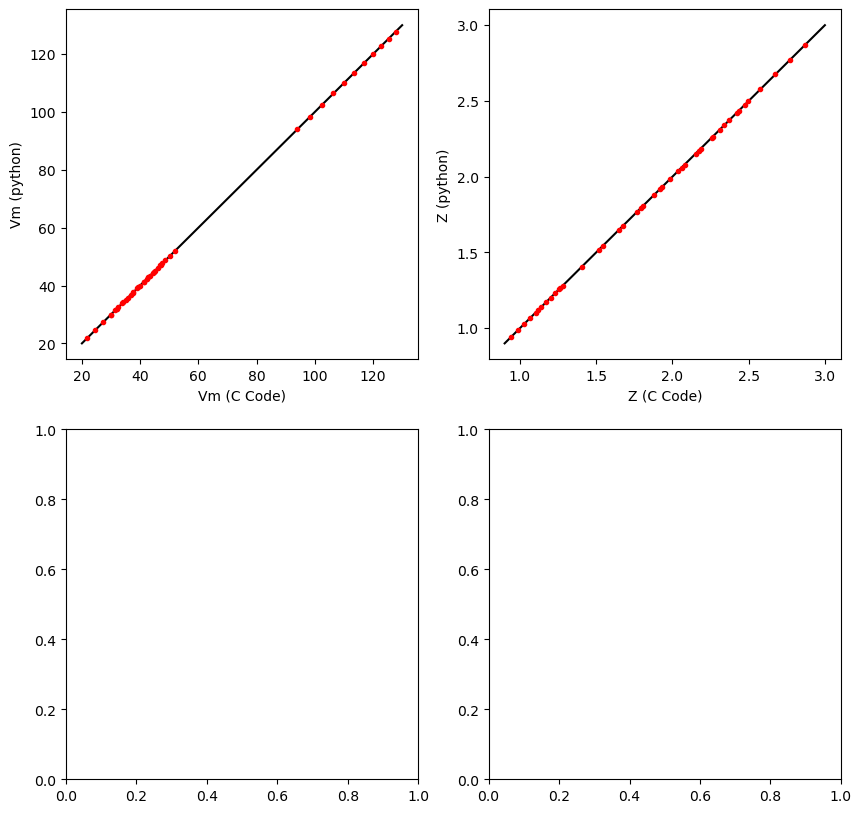

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
ax1.plot([20, 130], [20, 130], '-k')
ax1.plot(df_C['Vm (cm3/mol)'], df['Molar Volume (cm3/mol)'], '.r')
ax1.set_xlabel('Vm (C Code)')
ax1.set_ylabel('Vm (python)')
ax2.plot([0.9, 3], [0.9, 3], '-k')
ax2.plot(df_C['Z'], df['Compressability_factor'], '.r')
ax2.set_xlabel('Z (C Code)')
ax2.set_ylabel('Z (python)')

In [ ]:
P=1000
TK=1200
XH2O=0
XCO2=1-XH2O
Vmix=127.7426
Y = [0] * 2
Y[0]=XH2O
Y[1]=XCO2
k1_temperature, k2_temperature, k3_temperature, a1, a2, g, b, Vc, B, C, D, E, F, Vguess=pf.get_EOS_params(P, TK)
# Get mixing rules
Bij, Vcij, BVc_prm, BVc, Cijk, Vcijk, CVc2_prm, CVc2, Dijklm, Vcijklm, DVc4_prm, DVc4, Eijklmn, Vcijklmn, EVc5_prm,  EVc5, Fij, FVc2_prm, FVc2, bmix, b_prm, gijk, gVc2_prm, gVc2=pf.mixing_rules(B, Vc, Y, b, g, k1_temperature, k2_temperature, k3_temperature)
# 
Zmix=(P*Vmix)/(83.14467*TK)
lnphi_mix = [0.0, 0.0]
phi_mix = [0.0, 0.0]

lnphi_mix[0]=pf.mix_lnphi(0,  Zmix, BVc_prm, CVc2_prm, DVc4_prm, EVc5_prm, FVc2_prm, bmix, b_prm, gVc2, gVc2_prm, Vmix)
lnphi_mix[1]=pf.mix_lnphi(1,  Zmix, BVc_prm, CVc2_prm, DVc4_prm, EVc5_prm, FVc2_prm, bmix, b_prm, gVc2, gVc2_prm, Vmix)
import math
phi_mix[0]=math.exp(lnphi_mix[0])

phi_mix[1]=math.exp(lnphi_mix[1])

In [ ]:
Zmix

1.2803246036897693

In [ ]:
phi_mix

[0.9344286262003697, 1.2919713857921094]

In [ ]:
pf.mix_fugacity_ind(P_kbar=1, T_K=1200, XH2O=0, Vmix=127.7426)

phi_mix
[0.9344286262003697, 1.2919713857921094]


(0.0, 1.2919713857921094, 0.0, 0.9998968440662208, 1.2803246036897693)

In [ ]:
df=pf.H2O_CO2_EOS_DZ2006_knownP(P_kbar=df_C['P (bar)']/1000, T_K=df_C['T (K)'], XH2O=1-df_C['yCO2'])
df

phi_mix
[0.9344281964497142, 1.2919706609951094]
phi_mix
[0.9280670518989675, 1.2926602464757486]
phi_mix
[0.9230949759387839, 1.2942663745723368]
phi_mix
[0.9193652819748636, 1.2965722851564283]
phi_mix
[0.9167378215342085, 1.2993234106009621]
phi_mix
[0.9150681173413941, 1.3022044004874214]
phi_mix
[0.914194402433837, 1.3048082769152152]
phi_mix
[0.9139205586325142, 1.3065932169929033]
phi_mix
[0.9139918985521293, 1.306819931103272]
phi_mix
[0.9140587936119012, 1.304458251832093]
phi_mix
[0.9136194844785533, 1.2980437547579862]
phi_mix
[3.1553148052379676, 4.2541709358427555]
phi_mix
[2.739800582336002, 4.178100002696014]
phi_mix
[2.43717083943468, 4.147383675527983]
phi_mix
[2.2031041406610647, 4.154289200642389]
phi_mix
[2.0140963526415154, 4.198936572518836]
phi_mix
[1.8565216358547247, 4.288328220571881]
phi_mix
[1.7220326993949358, 4.438823865111753]
phi_mix
[1.6054749166658253, 4.684164642001788]
phi_mix
[1.5040778275436264, 5.098839236309897]
phi_mix
[1.4179203554127053, 5.882

,P_kbar,T_K,XH2O,XCO2,Molar Volume (cm3/mol),Density (g/cm3),Compressability_factor,fugacity_H2O,fugacity_CO2,activity_H2O,activity_CO2
0,1.0,1200,0.0,1.0,127.742642,0.344443,1.280325,0.000000,1.291971,0.000000,0.999896
1,1.0,1200,0.1,0.9,125.333500,0.330319,1.256179,0.092807,1.163394,0.100803,0.900387
2,1.0,1200,0.2,0.8,122.709086,0.316195,1.229875,0.184619,1.035413,0.200527,0.801338
3,1.0,1200,0.3,0.7,119.872066,0.301989,1.201441,0.275810,0.907601,0.299575,0.702420
4,1.0,1200,0.4,0.6,116.823775,0.287613,1.170889,0.366695,0.779594,0.398292,0.603352
5,1.0,1200,0.5,0.5,113.564332,0.272973,1.138220,0.457534,0.651102,0.496958,0.503908
6,1.0,1200,0.6,0.4,110.092734,0.257964,1.103425,0.548517,0.521923,0.595780,0.403933
7,1.0,1200,0.7,0.3,106.406995,0.242465,1.066484,0.639744,0.391978,0.694869,0.303364
8,1.0,1200,0.8,0.2,102.504402,0.226332,1.027370,0.731194,0.261364,0.794198,0.202278
9,1.0,1200,0.9,0.1,98.382100,0.209388,0.986053,0.822653,0.130446,0.893538,0.100956


In [ ]:
          
    # 'T_K': T_K,
    # 'P_kbar': P_kbar,
    # 'XH2O': XH2O,
    #
    


In [ ]:
Zmix

1.2803246036897693

In [ ]:
f[0]

NameError: name 'f' is not defined

In [ ]:
f[1]

1.2919713857921094

In [ ]:
phi

[0.0008619862091303538, 0.0008243032303709376]

In [ ]:
# Calculating molar volume
mol_vol=pf.calculate_molar_volume_DZ2006(P_kbar=df_C['P (bar)']/1000, T_K=df_C['T (K)'], XH2O=1-df_C['yCO2'])
# Calculating activity of CO2 and H2O, fugacity, and 
f, activity, phi=pf.mix_fugacity_ind(P_kbar=1000, T_K=1200, XH2O=0, Vmix=127.7426)
activity_CO2=activity[1]
activity_H2O=activity[0]


NameError: name 'df_C' is not defined

## Load in data from the C code to check

In [ ]:
df_C=pd.read_excel('Duan_Zhang_2006_C_Code.xlsx', sheet_name='Sheet1')
df_C.head()

,P (bar),T (K),yCO2,Vm (cm3/mol),Z,fH2O (kbar),fCO2 (kbar),aH2O,aCO2
0,1000,1200,1.0,127.7426,1.2803,0.000,1.292,0.0000,1.0000
1,1000,1200,0.9,125.3335,1.2562,0.093,1.163,0.1010,0.9003
2,1000,1200,0.8,122.7091,1.2299,0.185,1.035,0.2009,0.8009
3,1000,1200,0.7,119.8721,1.2014,0.277,0.907,0.3003,0.7016
4,1000,1200,0.6,116.8238,1.1709,0.368,0.778,0.3995,0.6021


In [ ]:
## Now lets calculate fugacity. 


### 1. Checking molar volumes for various pressures and XH2O

Text(0, 0.5, 'residual (Molar Volume C - DiadFit) ')

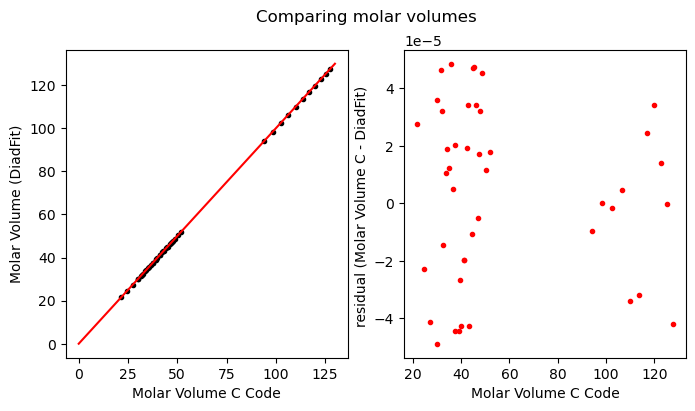

In [ ]:
diadf_mol_vols=pf.calculate_molar_volume_DZ2006(P_kbar=df_C['P (bar)']/1000, T_K=df_C['T (K)'], XH2O=1-df_C['yCO2'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
plt.suptitle('Comparing molar volumes')
ax1.plot(df_C['Vm (cm3/mol)'], diadf_mol_vols, '.k')
ax1.plot([0, 130], [0, 130], '-r')
ax2.plot(df_C['Vm (cm3/mol)'], df_C['Vm (cm3/mol)']-diadf_mol_vols, '.r')
ax1.set_xlabel('Molar Volume C Code')
ax1.set_ylabel('Molar Volume (DiadFit)')
ax2.set_xlabel('Molar Volume C Code')
ax2.set_ylabel('residual (Molar Volume C - DiadFit) ')
 

## Calculate molar volume (individual calcs)

In [ ]:
vol_CO2=pf.calculate_molar_volume_ind(P_kbar=1, T_K=1200, XH2O=0)
vol_H2O=pf.calculate_molar_volume_ind(P_kbar=1, T_K=1200, XH2O=1)
print('CO2 Diff between App and my calcs')
print(vol_CO2-127.7426)
print('H2O Diff')
print(vol_H2O-94.0385)

AttributeError: module 'DiadFit' has no attribute 'calculate_molar_volume_ind'

In [ ]:
vol_mix=pf.calculate_molar_volume_ind(P_kbar=1, T_K=1200, XH2O=0.5)
vol_mix

113.56433175387906